<a href="https://colab.research.google.com/github/kibrus/Emotion-detector/blob/main/CNN_Emotion_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Setup and load data

1.1 Install Dependencies and setups

In [140]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [141]:
!pip list

Package                          Version
-------------------------------- -------------------
absl-py                          1.4.0
accelerate                       0.34.2
aiohappyeyeballs                 2.4.0
aiohttp                          3.10.5
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.16
albumentations                   1.4.15
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.19.0
astropy                          6.1.3
astropy-iers-data                0.2024.9.16.0.32.21
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            24.2.0
audioread                        3.0.1
autograd                 

In [142]:
import tensorflow as tf
import os

In [143]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

Extracting the zip file

In [144]:
import zipfile
import os
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define the folder where your zip files are located in Google Drive
zip_folder_path = '/content/drive/MyDrive/Data/Imageclassification'

# Step 3: List of zip files to extract
zip_files = ['happy.zip', 'sad.zip']

# Step 4: Loop through each zip file and extract it to a corresponding folder
for zip_file in zip_files:
    # Full path to the zip file
    zip_path = os.path.join(zip_folder_path, zip_file)

    # Destination folder (based on the zip file name, e.g., 'happy' or 'sad')
    extract_to_path = os.path.join('/content/data', zip_file.split('.')[0])

    # Check if the file exists before extracting
    if os.path.exists(zip_path):
        # Create the destination folder if it doesn't exist
        if not os.path.exists(extract_to_path):
            os.makedirs(extract_to_path)

        # Extract the zip file into the corresponding folder
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to_path)  # Extract into the specified folder
        print(f"Files from {zip_file} extracted successfully to {extract_to_path}")
    else:
        print(f"File not found: {zip_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files from happy.zip extracted successfully to /content/data/happy
Files from sad.zip extracted successfully to /content/data/sad


In [145]:
!ls /content/drive/MyDrive/Data/Imageclassification

happy.zip  sad.zip


1.2 Remove dodgy images

In [146]:
import cv2
import imghdr

In [147]:
data_dir = 'data'

In [148]:
image_exts = ['jpeg', 'gif', 'bmp', 'png']

In [149]:
# Iterate through all files in the dataset and remove invalid images
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # Try to read the image using OpenCV
            img = cv2.imread(image_path)

            # Check if it's a valid image file using imghdr
            tip = imghdr.what(image_path)

            # If the image type is not in the allowed extensions, remove the file
            if tip not in image_exts:
                print(f"Image not in ext list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with Image {image_path}: {e}")

Image not in ext list data/sad/vector2.svg
Image not in ext list data/sad/vector6.svg
Image not in ext list data/sad/vector7.svg
Image not in ext list data/sad/sad-man-260nw-82004164.jpg
Image not in ext list data/sad/vector12.svg
Image not in ext list data/sad/portrait-sad-man-260nw-126009806.jpg
Image not in ext list data/sad/vector5.svg
Image not in ext list data/sad/1cd95b44e0d785987a6596d4baf940fc19-13-sad-white-man.2x.h473.w710.jpg
Image not in ext list data/sad/vector3.svg
Image not in ext list data/sad/depositphotos_36254119-stock-photo-desperate-sad-people.jpg
Image not in ext list data/sad/vector4.svg
Image not in ext list data/sad/vector.svg
Image not in ext list data/sad/vector11.svg
Image not in ext list data/sad/sad-person-pictures-1920-x-1110-ycv2h9n0pk9g5x7e.jpg
Image not in ext list data/sad/vector14.svg
Image not in ext list data/sad/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in ext list data/sad/vector8.svg
Image not in ext list data/sad/close

1.3 Load Data

In [150]:
import numpy as np
from matplotlib import pyplot as plt

In [151]:
#building data pipe line
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1695 files belonging to 2 classes.


Since the data file is not loaded into memory, we need to use the numpy_iterator to access the data.

In [152]:
#alowing as to loop through it
data_iterator = data.as_numpy_iterator()

In [153]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7f0005876d10>)

In [154]:
#grabing one batch back
batch = data_iterator.next()
batch

(array([[[[ 33.       ,  33.       ,  33.       ],
          [ 33.       ,  33.       ,  33.       ],
          [ 33.       ,  33.       ,  33.       ],
          ...,
          [142.57812  , 146.57812  , 146.97266  ],
          [133.91211  , 138.09375  , 136.54883  ],
          [120.       , 125.       , 121.       ]],
 
         [[ 33.       ,  33.       ,  33.       ],
          [ 33.       ,  33.       ,  33.       ],
          [ 33.       ,  33.       ,  33.       ],
          ...,
          [140.9414   , 144.9414   , 145.33594  ],
          [132.27539  , 136.45703  , 134.91211  ],
          [118.36328  , 123.36328  , 119.36328  ]],
 
         [[ 33.       ,  33.       ,  33.       ],
          [ 33.       ,  33.       ,  33.       ],
          [ 33.       ,  33.       ,  33.       ],
          ...,
          [138.48633  , 142.48633  , 143.30304  ],
          [129.69366  , 133.74866  , 133.72491  ],
          [115.21094  , 119.51367  , 117.60547  ]],
 
         ...,
 
         [[ 

In [155]:
#batch have 2 parts or length. The first part is images and labels
len(batch)

2

In [156]:
batch[0].shape

(32, 256, 256, 3)

In [157]:
#lable
batch[1]

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int32)

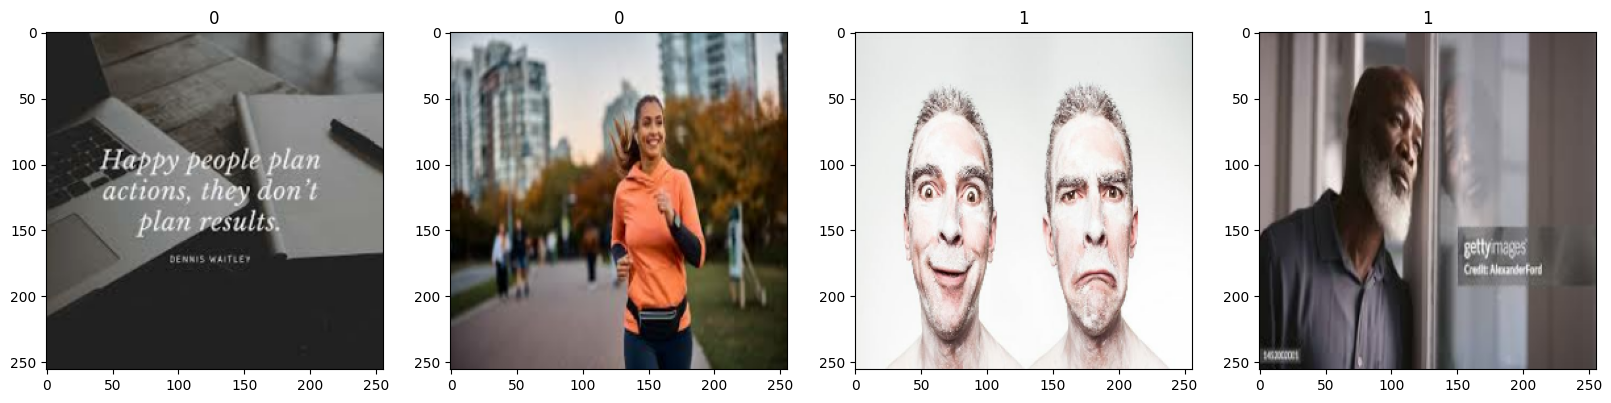

In [158]:
#check labels
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# sad - 1,  happy - 0

#2, preprocess Dat

2.1 Scale Data

In [159]:
data = data.map(lambda x, y: (x/255, y))

In [160]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()

1.0

2.2 Split Data

In [161]:
#number of batch
len(data)

53

In [177]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [178]:
train_size + val_size + test_size == len(data)

True

In [179]:
#split out data
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

#3, Deep model

3.1 Build Deep Learning Model

In [180]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [181]:
model=Sequential([
    Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),

    Conv2D(32, (3,3), 1, activation='relu'),
    MaxPooling2D(),

    Conv2D(16, (3,3), 1, activation='relu'),
    MaxPooling2D(),

    Flatten(),

    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [182]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [183]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

3.2 Train

In [184]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [186]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.9289 - loss: 0.2029 - val_accuracy: 0.8210 - val_loss: 0.4567
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step - accuracy: 0.9631 - loss: 0.1443 - val_accuracy: 0.8267 - val_loss: 0.4324
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - accuracy: 0.9673 - loss: 0.1074 - val_accuracy: 0.8608 - val_loss: 0.4852
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.9677 - loss: 0.0951 - val_accuracy: 0.8494 - val_loss: 0.4831
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 212ms/step - accuracy: 0.9746 - loss: 0.0780 - val_accuracy: 0.8636 - val_loss: 0.5624
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 236ms/step - accuracy: 0.9877 - loss: 0.0442 - val_accuracy: 0.8466 - val_loss: 0.5342
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step - accuracy: 0.9803 - loss: 0.0688 - val_accuracy: 0.8381 - val_loss: 0.6325
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.9934 - loss: 0.0336 - val_accuracy: 0

#Overfitted!!!